# Actividad 8 - Random Forest
### Desafío 1: Preparación del ambiente de trabajo
- Importe las librerías clásicas a utilizar.
- Para este ejercicio Random Forest de Regresión
- De manera adicional importe las funciones y clases necesarias para generar un desempeño de métricas en problemas de regresión.
- Elimine la columna 'Unnamed: 0' cuando cargue los datos.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
import pickle

In [4]:
seed = 602
p_muestra = 0.3

In [5]:
df = pd.read_csv('ames_housing.csv').drop(columns='Unnamed: 0')
for colname, serie in df.iteritems():    
    if(serie.dtype == 'object'):
        df = pd.concat([df, pd.get_dummies(serie, drop_first=True, prefix=colname)], axis=1).drop(columns=colname)

### Desafío 2: Importación de archivos serializados
- Importe su modelo entrenado y sus conjuntos de entrenamiento y validación serializados la sesión pasada y evalúe el desempeño del modelo de su compañero con el suyo ¿Cuál es mejor? Si no puede ejecutar el modelo, comente cuáles pueden ser los causantes.
- No es necesario que realice diagnósticos gráficos sobre el modelo, sólo reporte sus métricas.
- Para importar un archivo serializado, puede ocupar la siguiente línea de código:

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Sale_Price']), df['Sale_Price'], test_size=p_muestra, random_state=seed)

In [7]:
modelo_ag7 = pickle.load(open('./andres/andres-gallardo-actividad07.sav','rb'))
X_test_ag = pickle.load(open('./andres/X_test-andres-gallardo-actividad07.sav','rb'))
y_test_ag = pickle.load(open('./andres/y_test-andres-gallardo-actividad07.sav','rb'))
X_train_ag = pickle.load(open('./andres/X_train-andres-gallardo-actividad07.sav','rb'))
y_train_ag = pickle.load(open('./andres/y_train-andres-gallardo-actividad07.sav','rb'))

In [8]:
modelo_cf7 = pickle.load(open('./cristian/CristianFarias-actividad07.sav','rb'))
X_test_cf = pickle.load(open('./cristian/CF-act07-X_test_top.sav','rb'))
y_test_cf = pickle.load(open('./cristian/CF-act07-y_test_top.sav','rb'))

Creamos nuevas dataframe de test a partir de una nueva división de la muestra común. Generamos el X_test dependiendo de los atributos utilizados en cada modelo

In [9]:

X_test_ag2 = X_test[X_test_ag.columns]
X_test_cf2 = X_test[X_test_cf.columns]


In [10]:
#Calculamos Métricas de mi Modelo
print("Test MSE:", mean_squared_error(y_test, modelo_ag7.predict(X_test_ag2)).round(5))
print("Test MAE:", median_absolute_error(y_test, modelo_ag7.predict(X_test_ag2)).round(5))
print("Test R2:", r2_score(y_test, modelo_ag7.predict(X_test_ag2)).round(5))

Test MSE: 1548898181.47057
Test MAE: 17925.42308
Test R2: 0.78255


In [11]:
#Calculamos Métricas de Cristian
print("Test MSE:", mean_squared_error(y_test, modelo_cf7.predict(X_test_cf2)).round(5))
print("Test MAE:", median_absolute_error(y_test, modelo_cf7.predict(X_test_cf2)).round(5))
print("Test R2:", r2_score(y_test, modelo_cf7.predict(X_test_cf2)).round(5))

Test MSE: 618723643.36151
Test MAE: 11946.52778
Test R2: 0.91314


- El modelo de mi compañero es mejor que el mio

### Desafío 3: Evaluación Random Forest
- En base a los conjuntos de entrenamiento serializados, genere un modelo utilizando sklearn.ensemble.RandomForest sin modificar hiperparámetros, sólo declarando la semilla pseudoaleatoria.
- Reporte su desempeño y compárelo con su modelo de la sesión pasada, así como con el de su compañero.

In [12]:
modelo_rf = RandomForestRegressor(random_state=seed).fit(X_train_ag, y_train_ag)

/Users/andres/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [13]:
print("Test MSE:", mean_squared_error(y_test_ag, modelo_rf.predict(X_test_ag)).round(5))
print("Test MAE:", median_absolute_error(y_test_ag, modelo_rf.predict(X_test_ag)).round(5))
print("Test R2:", r2_score(y_test_ag, modelo_rf.predict(X_test_ag)).round(5))

Test MSE: 1738445711.47345
Test MAE: 17488.2
Test R2: 0.76201


- El modelo de mi compañero sigue siendo el mejor modelo

### Desafío 4: Reporte las métricas de desempeño con los siguientes hiperparámetros
- Para afinar el comportamiento de nuestro modelo, evalúe su desempeño los siguientes hiperparámetros:
 - max_features : None , log2 , sqrt .
 - n_estimators : Evaluar entre 20 y 1000 en pasos de 50.
- Guarde la tasa de error en la exactitud medida con OOB.
- Grafique el comportamiento.

In [14]:
n_estimatos = range(20, 1000 , 50)


In [15]:
%%time

tmp_oob = pd.DataFrame(columns=['None', 'log2', 'sqrt'])
error = pd.DataFrame(columns=['None', 'log2', 'sqrt'])
oob_none, oob_log2, oob_sqrt = [], [], []
mse_none, mse_log2, mse_sqrt = [], [], []

for est in n_estimatos:
    for mf in [None, 'log2', 'sqrt']:
        modelo_rf = RandomForestRegressor(
            random_state=seed, 
            n_estimators= est,
            max_features=mf, 
            oob_score=True,
            warm_start=True,
        ).fit(X_train_ag, y_train_ag)
        
        # Estimamos el error en OOB
        if(mf == None):
            oob_none.append(modelo_rf.oob_score_)
            mse_none.append(mean_squared_error(y_test_ag, modelo_rf.predict(X_test_ag)).round(5))
        elif (mf == 'log2'):
            oob_log2.append(modelo_rf.oob_score_)
            mse_log2.append(mean_squared_error(y_test_ag, modelo_rf.predict(X_test_ag)).round(5))
        else:
            oob_sqrt.append(modelo_rf.oob_score_)
            mse_sqrt.append(mean_squared_error(y_test_ag, modelo_rf.predict(X_test_ag)).round(5))
   


/Users/andres/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/andres/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/andres/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


CPU times: user 3min 18s, sys: 4.01 s, total: 3min 22s
Wall time: 3min 30s


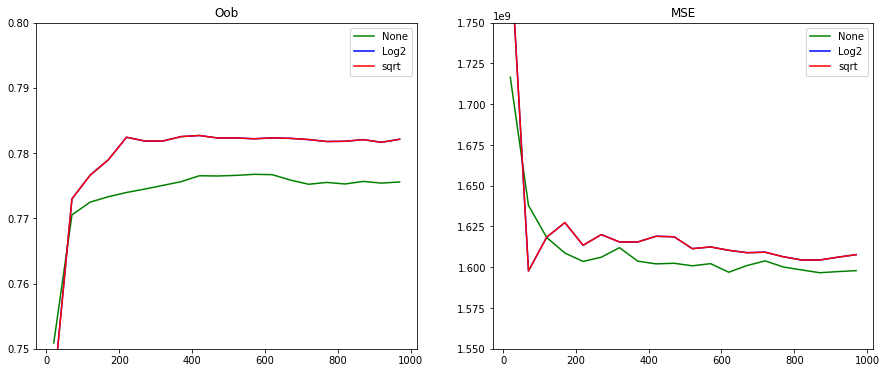

In [40]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Oob')
plt.plot(n_estimatos, oob_none, color="green", label="None")
plt.plot(n_estimatos, oob_log2, color="blue", label="Log2")
plt.plot(n_estimatos, oob_sqrt, color="red", label="sqrt")
plt.legend()
plt.ylim(0.75, 0.8)

plt.subplot(1,2,2)
plt.title('MSE')
plt.plot(n_estimatos, mse_none, color="green", label="None")
plt.plot(n_estimatos, mse_log2, color="blue", label="Log2")
plt.plot(n_estimatos, mse_sqrt, color="red", label="sqrt")
plt.legend()
plt.ylim(1.55e9, 1.75e9);



### Desafío 5: Refactorice el modelo
- En base a la mejor combinación de hiperparámetros, reentrene el modelo y comente su desempeño.

In [32]:
n_estimatos[mse_log2.index(min(mse_log2))]

70

In [38]:
modelo_rf2 = RandomForestRegressor(
            random_state=seed, 
            n_estimators= 70,
            max_features='log2', 
        ).fit(X_train_ag, y_train_ag)

In [39]:
print("Test MSE:", mean_squared_error(y_test_ag, modelo_rf2.predict(X_test_ag)).round(5))
print("Test MAE:", median_absolute_error(y_test_ag, modelo_rf2.predict(X_test_ag)).round(5))
print("Test R2:", r2_score(y_test_ag, modelo_rf2.predict(X_test_ag)).round(5))

Test MSE: 1597735060.44045
Test MAE: 16171.58571
Test R2: 0.78127


- El modelo mejoró respecto del modelo Random Forest sin Hiperparámetros
